
## **Credit Default Prediction**

### **Business Problem**
Financial institutions need to **predict credit default risk** to minimize losses. The goal of this project is to analyze borrower data and identify key risk factors that influence default likelihood.

### **Project Objective**
- Perform **Exploratory Data Analysis (EDA)** to understand patterns in borrower behavior.
- Identify **key predictors** of default risk.
- Use these insights to inform risk management strategies.

---

## **Key Findings from EDA**

### **Credit Utilization & Default Risk**
- Borrowers with **higher revolving credit utilization** have a significantly **higher risk of default**.
- Default rates increase with **credit utilization above 30%**.

### **Impact of Late Payments**
- **Default rate for borrowers with past due payments (90+ days) is 41.64%**, compared to only **4.63% for on-time payers**.
- **Number of times 90 days late** is a strong risk factor.

### **Income & Debt Analysis**
- **1634 borrowers have $0 income**, and their credit utilization is **4.3x higher** than average.
- **DebtRatio is extremely high (median ~36%)**, but outliers exist with values exceeding 300,000%.
- Borrowers with **lower incomes** tend to have **higher debt ratios**, increasing their risk.

### **Age & Default Risk**
- **Younger borrowers (18-35) have higher default rates** and **higher debt utilization** compared to older groups.
- Some unrealistic ages (e.g., **109 years**) exist in the dataset, indicating possible data errors.

### **Number of Open Credit Lines**
- **Mixed impact** on default:
  - Borrowers with **very few credit lines (0-3)** have a higher risk, possibly due to **thin credit history**.
  - Those with **excessive credit lines (13+)** also show increased risk, likely due to **overleveraging**.

---


# Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
# Set plot style
sns.set_style("whitegrid")

# Load dataset

In [2]:
# Load dataset
df_train = pd.read_csv("cs-training.csv")
df_test = pd.read_csv("cs-test.csv")

# drop unnecessary column
df_train.drop(columns=["Unnamed: 0"], inplace=True)
df_test.drop(columns=["Unnamed: 0"], inplace=True)

## Rename features

In [3]:
rename_dict = {
    "SeriousDlqin2yrs": "Default",
    "RevolvingUtilizationOfUnsecuredLines": "RevolvingUtil",
    "NumberOfTime30-59DaysPastDueNotWorse": "PastDue30_59",
    "DebtRatio": "DebtRatio",
    "MonthlyIncome": "Income",
    "NumberOfOpenCreditLinesAndLoans": "OpenCreditLines",
    "NumberOfTimes90DaysLate": "PastDue90",
    "NumberRealEstateLoansOrLines": "RealEstateLoans",
    "NumberOfTime60-89DaysPastDueNotWorse": "PastDue60_89",
    "NumberOfDependents": "Dependents"
}

df_train.rename(columns=rename_dict, inplace=True)
df_test.rename(columns=rename_dict, inplace=True)

In [5]:
df_train.to_csv('cs-training.csv', index = False)

In [6]:
df_test.to_csv('cs-test.csv', index = False)

# Basic Data Exploration

In [6]:
# Display first few rows
df_train.head()

,Default,RevolvingUtil,age,PastDue30_59,DebtRatio,Income,OpenCreditLines,PastDue90,RealEstateLoans,PastDue60_89,Dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [24]:
# df_train[df_train['DebtRatio'] < 1]

In [25]:
# Check dataset shape
print(f"Dataset contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.")

# Check column data types and missing values
print(df_train.info())

# Summary statistics
df_train.describe()

Dataset contains 150000 rows and 11 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Default          150000 non-null  int64  
 1   RevolvingUtil    150000 non-null  float64
 2   age              150000 non-null  int64  
 3   PastDue30_59     150000 non-null  int64  
 4   DebtRatio        150000 non-null  float64
 5   Income           120269 non-null  float64
 6   OpenCreditLines  150000 non-null  int64  
 7   PastDue90        150000 non-null  int64  
 8   RealEstateLoans  150000 non-null  int64  
 9   PastDue60_89     150000 non-null  int64  
 10  Dependents       146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB
None


,Default,RevolvingUtil,age,PastDue30_59,DebtRatio,Income,OpenCreditLines,PastDue90,RealEstateLoans,PastDue60_89,Dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Default                0
RevolvingUtil          0
age                    0
PastDue30_59           0
DebtRatio              0
Income             29731
OpenCreditLines        0
PastDue90              0
RealEstateLoans        0
PastDue60_89           0
Dependents          3924
dtype: int64


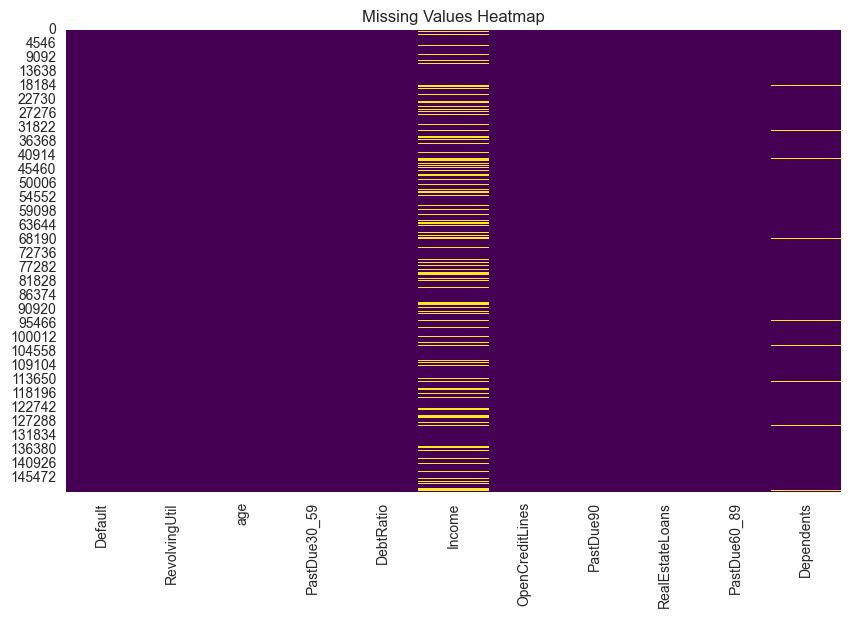

In [26]:
# Check missing values
print(df_train.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Exploratory Data Analysis

# Univariate analysis

In [29]:
def univariate_analysis(data):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop(['Default', 'Dependents'], errors='ignore')

    for column in numeric_columns:
        print(f'\nAnalysis for {column}:\n')
        print(data[column].describe())
        
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f'Histogram of {column}')
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=data[column])
        plt.title(f'Box Plot of {column}')
        
        plt.tight_layout()
        plt.show()


Analysis for RevolvingUtil:

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtil, dtype: float64


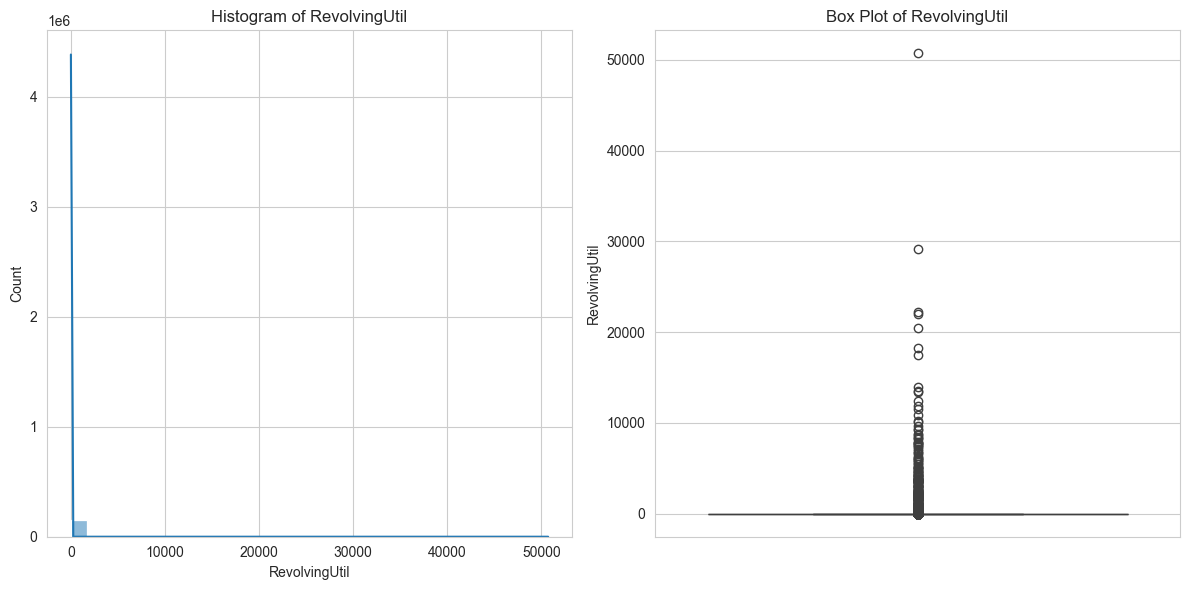


Analysis for age:

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64


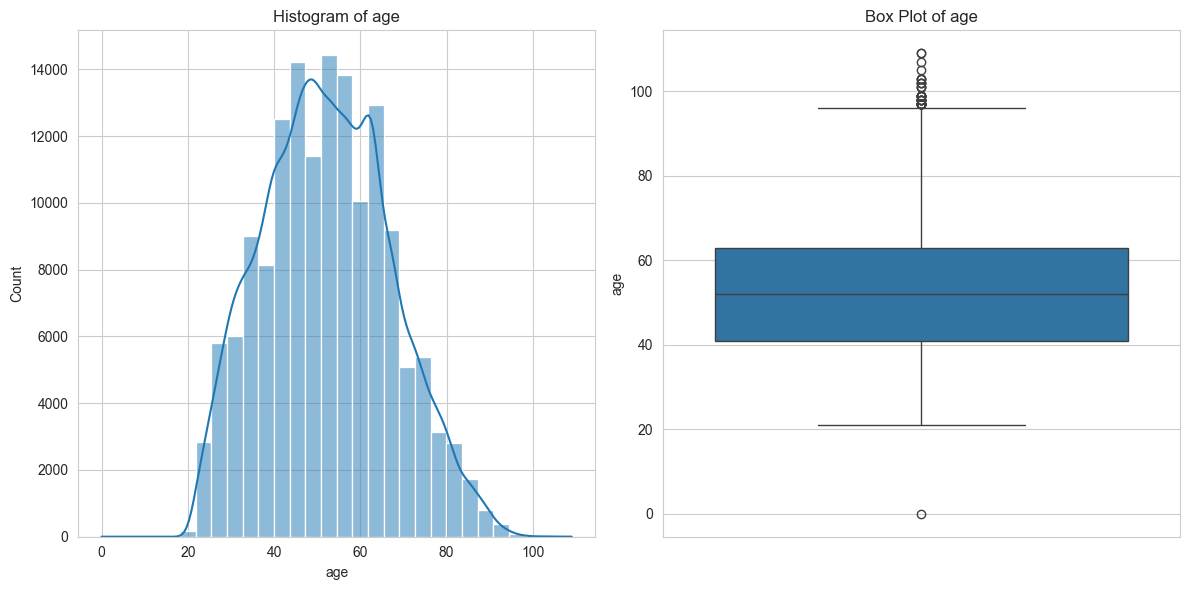


Analysis for PastDue30_59:

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: PastDue30_59, dtype: float64


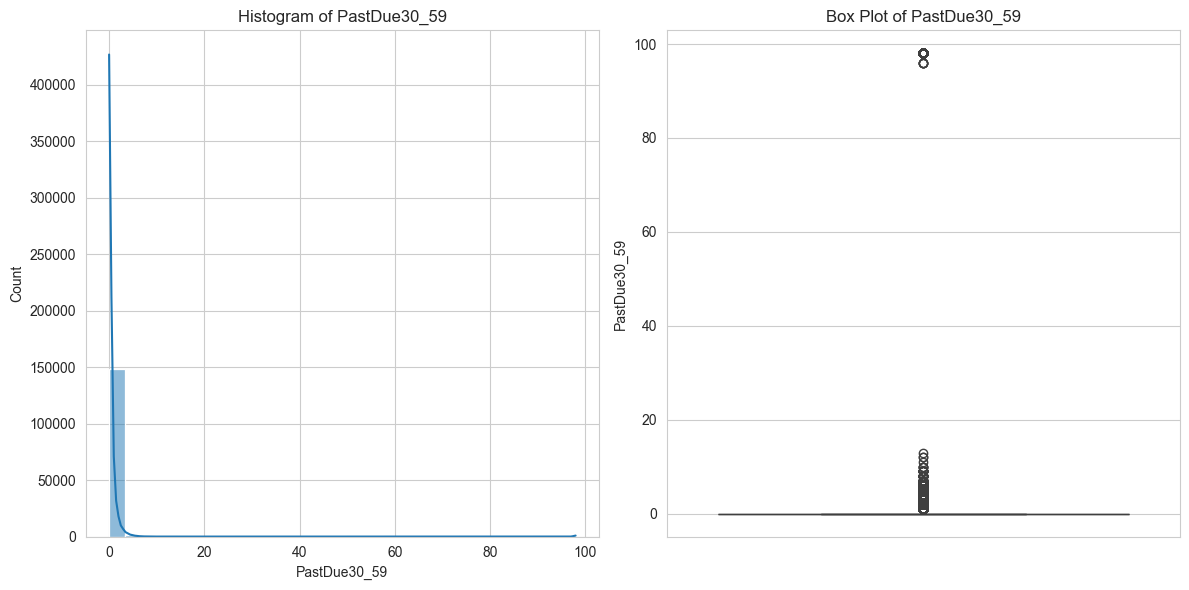


Analysis for DebtRatio:

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64


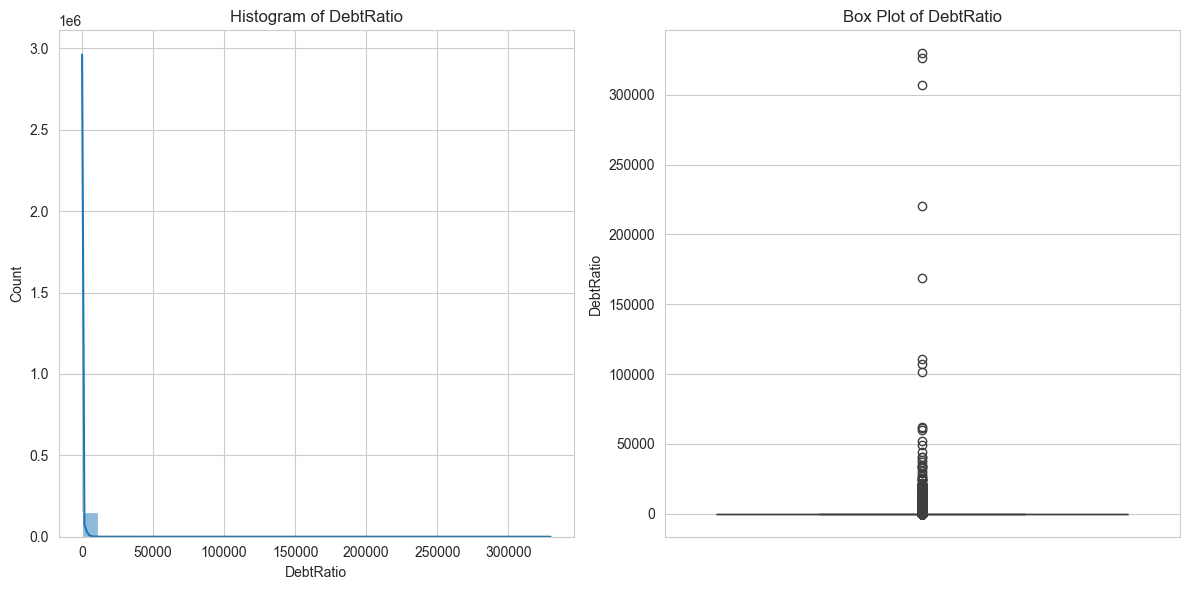


Analysis for Income:

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: Income, dtype: float64


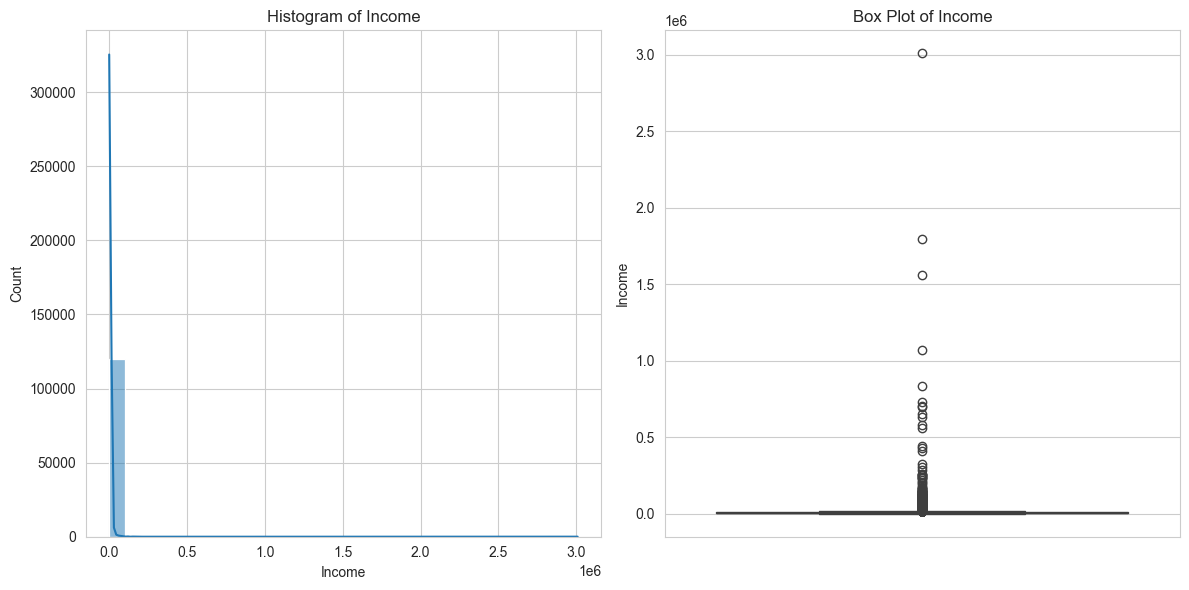


Analysis for OpenCreditLines:

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: OpenCreditLines, dtype: float64


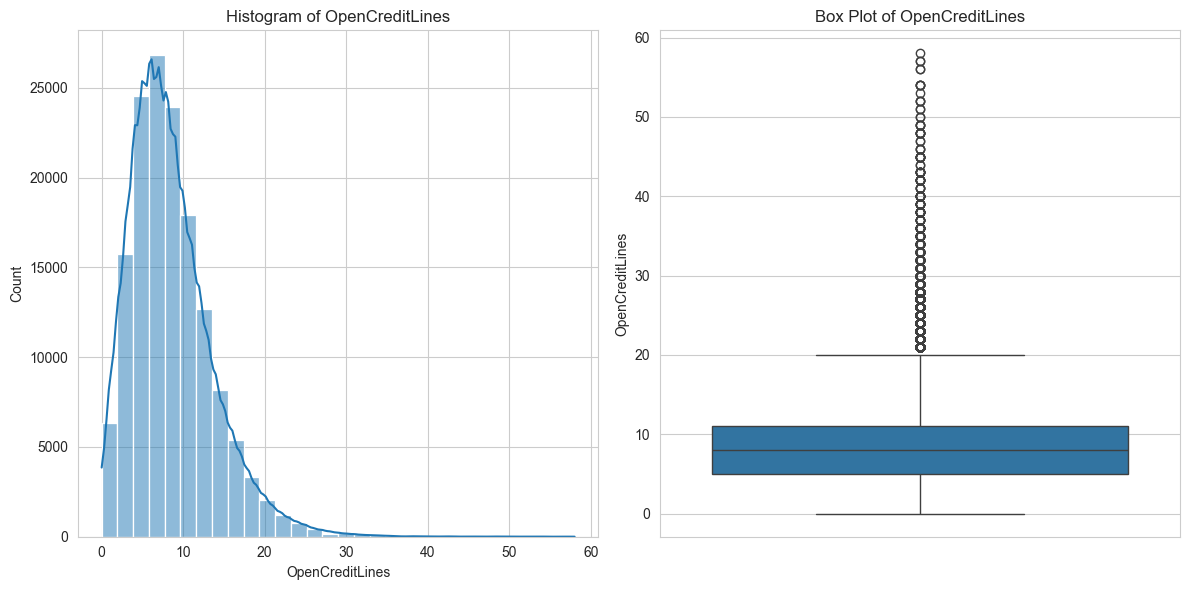


Analysis for PastDue90:

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: PastDue90, dtype: float64


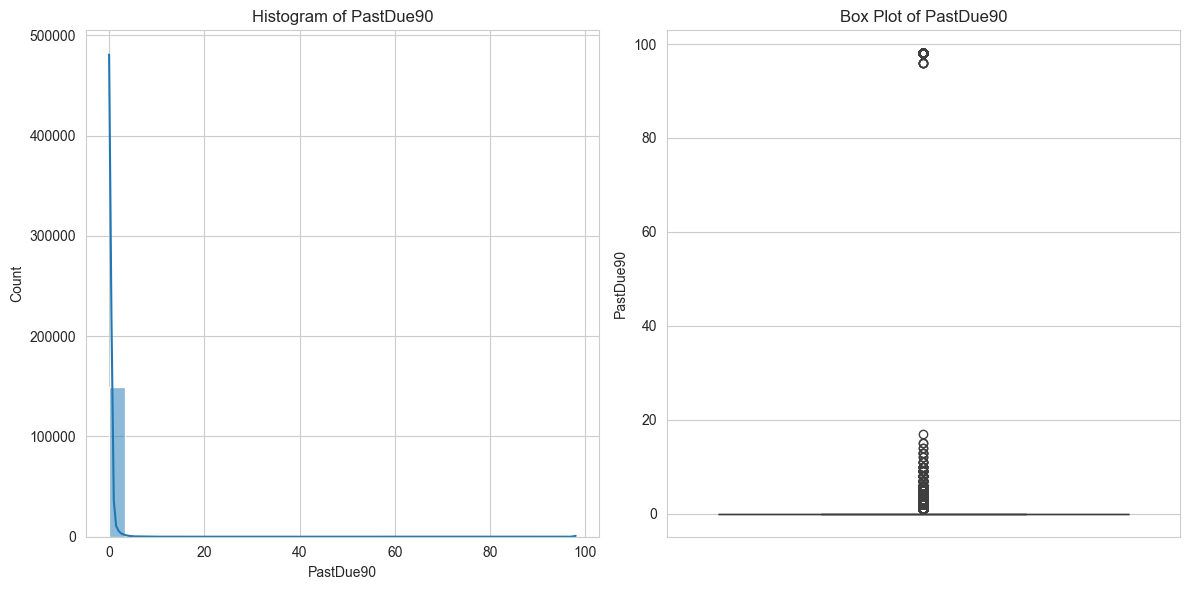


Analysis for RealEstateLoans:

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: RealEstateLoans, dtype: float64


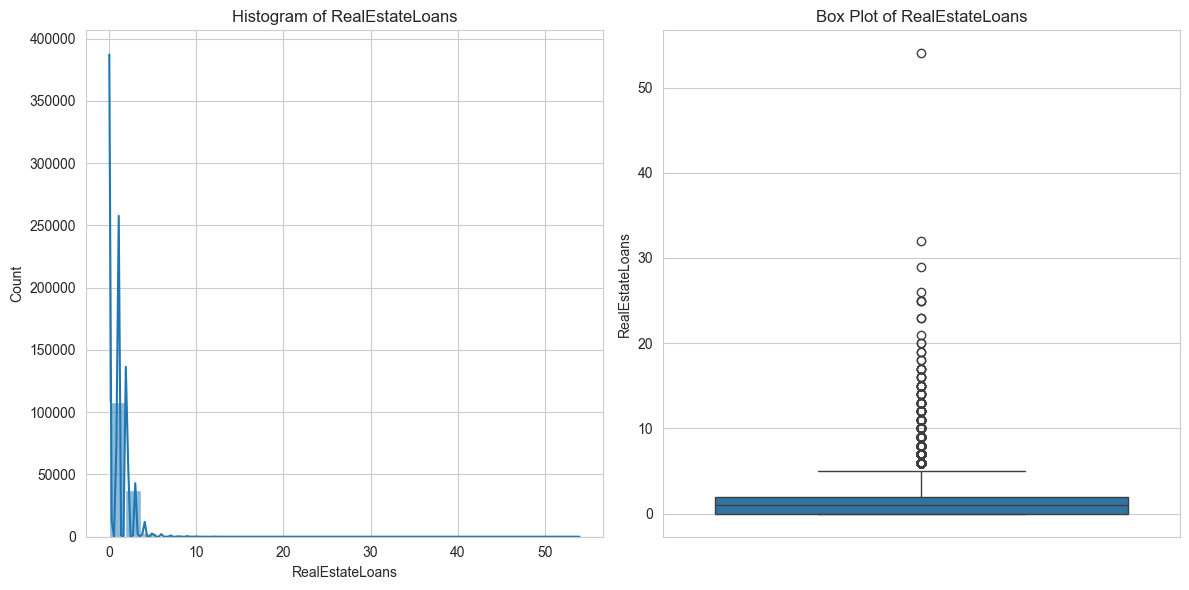


Analysis for PastDue60_89:

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: PastDue60_89, dtype: float64


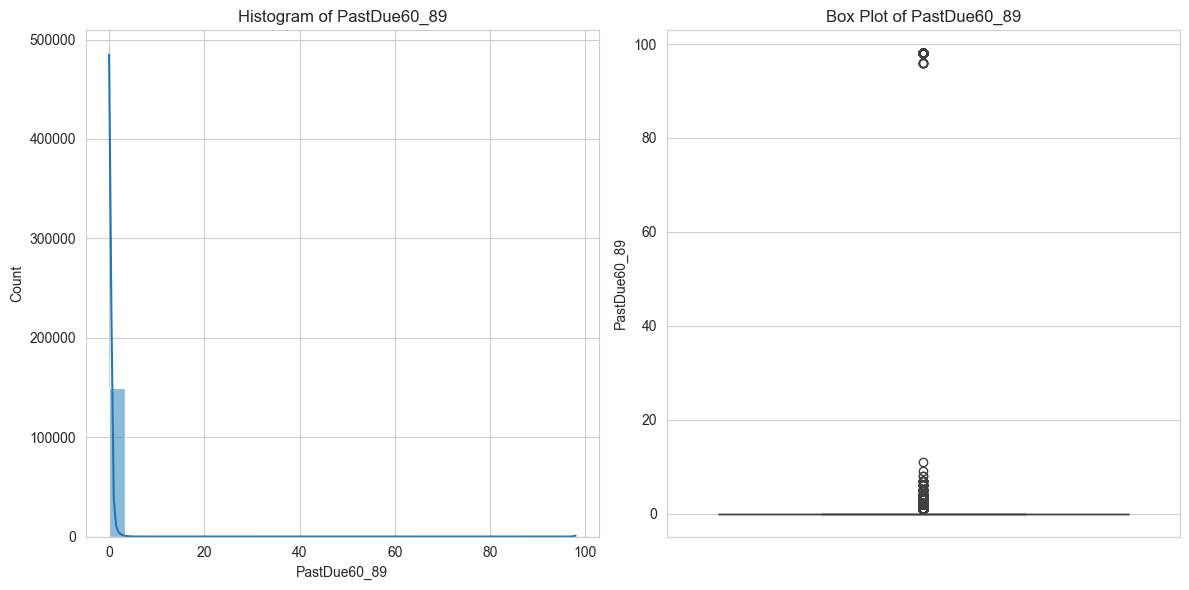

In [30]:
# Perform univariate analysis
univariate_analysis(df_train)

## Target variable distribution

Default
0    93.316
1     6.684
Name: proportion, dtype: float64


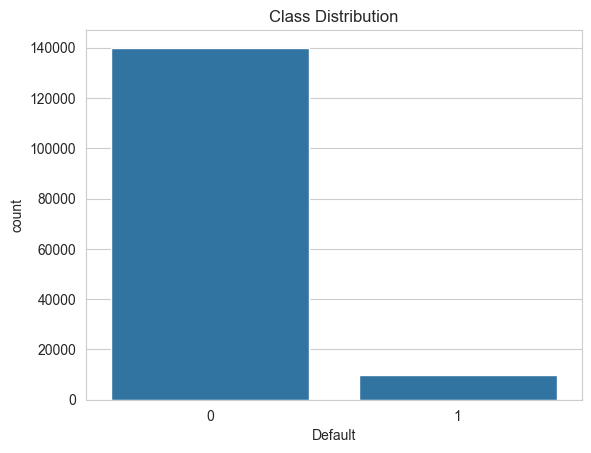

In [31]:
# Check target variable distribution (SeriousDlqin2yrs)
print(df_train["Default"].value_counts(normalize=True) * 100)

# Plot class distribution
sns.countplot(x="Default", data=df_train)
plt.title("Class Distribution")
plt.show()

Dependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64


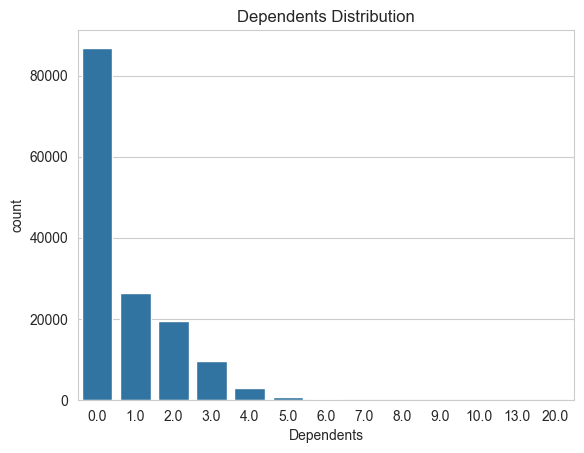

In [32]:
print(df_train["Dependents"].value_counts())

# Plot Dependents distribution
sns.countplot(x="Dependents", data=df_train)
plt.title("Dependents Distribution")
plt.show()

## Bivariate analysis with target variable

C:\Users\User\AppData\Local\Temp\ipykernel_12020\1722765532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["Default"], y=df_train["age"], palette=["lightblue", "salmon"])


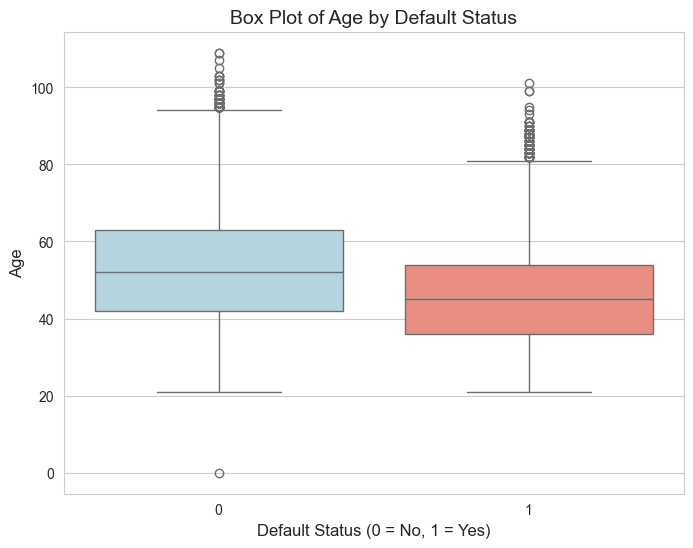

In [10]:
# Set plot style
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train["Default"], y=df_train["age"], palette=["lightblue", "salmon"])

# Add labels and title
plt.xlabel("Default Status (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.title("Box Plot of Age by Default Status", fontsize=14)
plt.show()

Interpretation:

- Default Risk is Higher for Younger Borrowers
- The interquartile range (IQR) for defaulters is lower than non-defaulters.
- This suggests younger people are more likely to default than older ones.
- Older individuals (especially above 60) tend to be more financially stable.

- There are extreme low ages (0) which are unrealistic.
- There are also very high ages (100+), which are rare but possible.

C:\Users\User\AppData\Local\Temp\ipykernel_12020\4049867760.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df_train.groupby("Age_Group")[["DebtRatio", "RevolvingUtil"]].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_12020\4049867760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_stats.index, y=age_group_stats["DebtRatio"], palette="Blues")


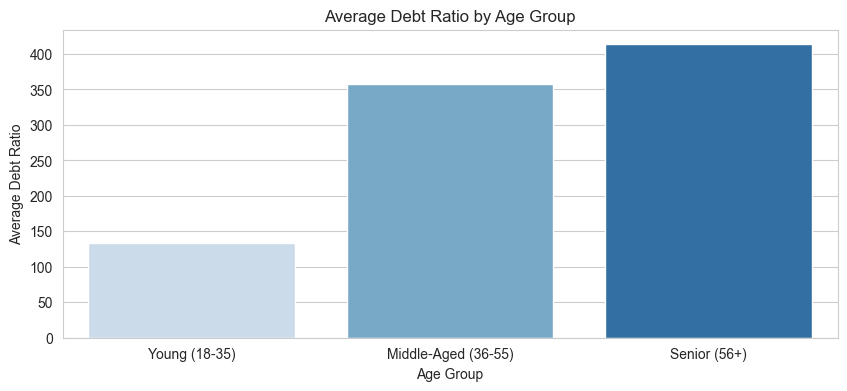

C:\Users\User\AppData\Local\Temp\ipykernel_12020\4049867760.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_stats.index, y=age_group_stats["RevolvingUtil"], palette="Reds")


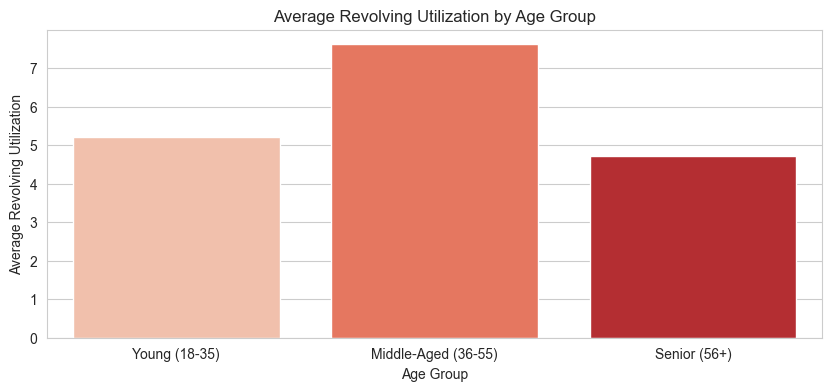

                      DebtRatio  RevolvingUtil
Age_Group                                     
Young (18-35)        133.622422       5.215706
Middle-Aged (36-55)  357.142395       7.617116
Senior (56+)         413.396197       4.727608


In [12]:
# Define age groups
bins = [18, 35, 55, 100]  # Age categories
labels = ["Young (18-35)", "Middle-Aged (36-55)", "Senior (56+)"]
df_train["Age_Group"] = pd.cut(df_train["age"], bins=bins, labels=labels, right=False)

# Calculate mean DebtRatio and RevolvingUtilization for each age group
age_group_stats = df_train.groupby("Age_Group")[["DebtRatio", "RevolvingUtil"]].mean()

# Plot Debt Ratio across Age Groups
plt.figure(figsize=(10, 4))
sns.barplot(x=age_group_stats.index, y=age_group_stats["DebtRatio"], palette="Blues")
plt.title("Average Debt Ratio by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Debt Ratio")
plt.show()

# Plot Revolving Utilization across Age Groups
plt.figure(figsize=(10, 4))
sns.barplot(x=age_group_stats.index, y=age_group_stats["RevolvingUtil"], palette="Reds")
plt.title("Average Revolving Utilization by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Revolving Utilization")
plt.show()

# Display numerical comparison
print(age_group_stats)

Interpretation:

- Middle-aged borrowers (36-55) appear the riskiest, with high DebtRatio and the highest credit utilization.
- Seniors are the most financially stable, with high DebtRatio but low utilization.
- Younger borrowers have lower DebtRatio but still use credit significantly.

C:\Users\User\AppData\Local\Temp\ipykernel_12020\1645341570.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_default = df_train.groupby("Age_Group")["Default"].mean() * 100  # Convert to percentage
C:\Users\User\AppData\Local\Temp\ipykernel_12020\1645341570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_default.index, y=age_group_default.values, palette="coolwarm")


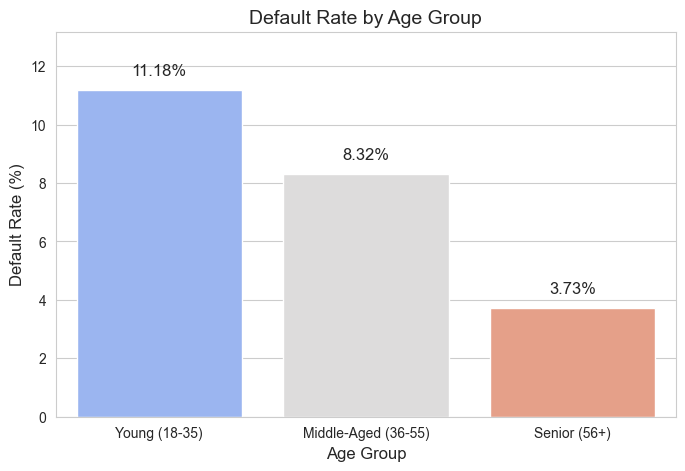

Age_Group
Young (18-35)          11.175217
Middle-Aged (36-55)     8.318156
Senior (56+)            3.730431
Name: Default, dtype: float64


In [16]:
# Calculate default rate per age group
age_group_default = df_train.groupby("Age_Group")["Default"].mean() * 100  # Convert to percentage

# Plot default rate per age group
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_default.index, y=age_group_default.values, palette="coolwarm")

# Add labels
plt.title("Default Rate by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.ylim(0, max(age_group_default.values) + 2)  # Adjust y-axis for clarity

# Show percentage values on bars
for i, rate in enumerate(age_group_default.values):
    plt.text(i, rate + 0.5, f"{rate:.2f}%", ha="center", fontsize=12)

plt.show()

# Display numerical default rates
print(age_group_default)

Interpretation:

- Young borrowers (18-35) are the riskiest → 11.18% default rate
- Middle-aged borrowers (36-55) have a moderate risk → 8.32% default rate
- Seniors (56+) are the most financially stable → 3.73% default rate

## Analyzing Income Levels and Default Risk

We’ll analyze how income levels affect default rates to see if lower-income borrowers struggle more with repayments.

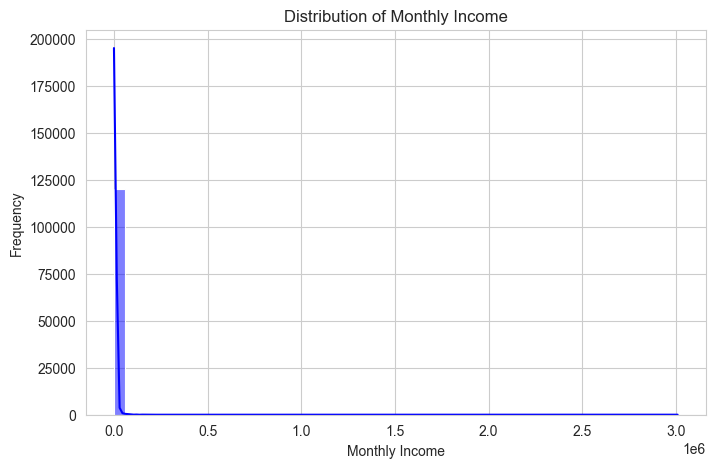

In [8]:
# Income distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_train["Income"].dropna(), bins=50, kde=True, color="blue")
plt.title("Distribution of Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Average income by default status
income_by_default = df_train.groupby("Default")["Income"].mean()
print("Average Monthly Income by Default Status:")
print(income_by_default)

Average Monthly Income by Default Status:
Default
0    6747.837774
1    5630.826493
Name: Income, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_6972\2801626382.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_default_rate = df_train.groupby("Income_Group")["Default"].mean() * 100
C:\Users\User\AppData\Local\Temp\ipykernel_6972\2801626382.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_default_rate.index, y=income_default_rate.values, palette="coolwarm")


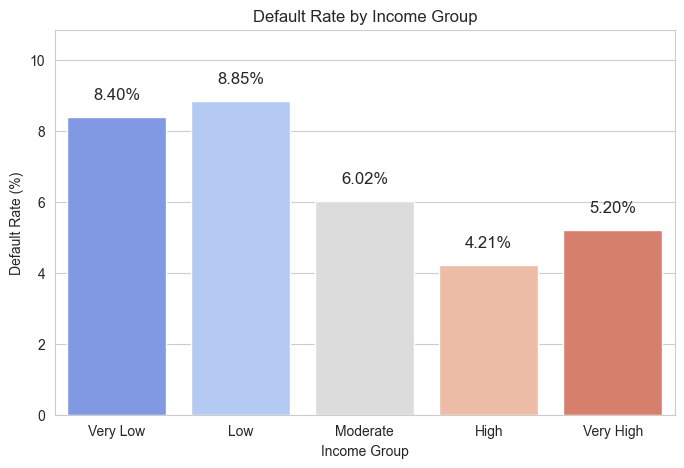

Income_Group
Very Low     8.395334
Low          8.849935
Moderate     6.017053
High         4.210587
Very High    5.197595
Name: Default, dtype: float64


In [10]:
# Income categories
bins = [0, 2000, 5000, 10000, 20000, df_train["Income"].max()]
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]
df_train["Income_Group"] = pd.cut(df_train["Income"], bins=bins, labels=labels, right=False)

# Default rates within each income group
income_default_rate = df_train.groupby("Income_Group")["Default"].mean() * 100

# Default rates by income group
plt.figure(figsize=(8, 5))
sns.barplot(x=income_default_rate.index, y=income_default_rate.values, palette="coolwarm")
plt.title("Default Rate by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Default Rate (%)")
plt.ylim(0, max(income_default_rate.values) + 2)

for i, rate in enumerate(income_default_rate.values):
    plt.text(i, rate + 0.5, f"{rate:.2f}%", ha="center", fontsize=12)

plt.show()

# Display default rates numerically
print(income_default_rate)

Interpretation:

- Low-income borrowers (≤ $5,000) have the highest default rates.
- Higher income generally reduces default risk, but some very high-income borrowers still default.
- Financial mismanagement might be a factor for high earners who default.

## Debt Levels by Income Group

We will now analyze how DebtRatio varies across different income groups to see if lower-income borrowers carry more debt relative to their earnings.

C:\Users\User\AppData\Local\Temp\ipykernel_6972\454622121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  debt_by_income = df_train.groupby("Income_Group")["DebtRatio"].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6972\454622121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=debt_by_income.index, y=debt_by_income.values, palette="coolwarm")


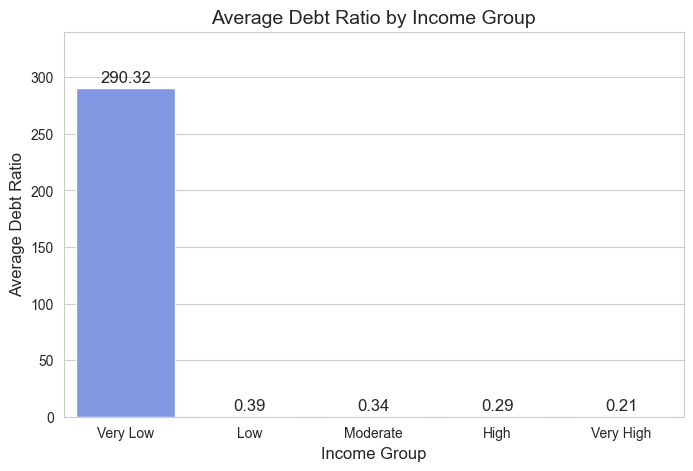

Income_Group
Very Low     290.322773
Low            0.393155
Moderate       0.338830
High           0.293383
Very High      0.211158
Name: DebtRatio, dtype: float64


In [11]:
debt_by_income = df_train.groupby("Income_Group")["DebtRatio"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=debt_by_income.index, y=debt_by_income.values, palette="coolwarm")

plt.title("Average Debt Ratio by Income Group", fontsize=14)
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Average Debt Ratio", fontsize=12)
plt.ylim(0, max(debt_by_income.values) + 50)

for i, ratio in enumerate(debt_by_income.values):
    plt.text(i, ratio + 5, f"{ratio:.2f}", ha="center", fontsize=12)

plt.show()

print(debt_by_income)

Interpretation:

- Lower-income borrowers have significantly higher debt burdens.
- Very Low-Income group (≤ $2,000) is at extreme financial risk (DebtRatio = 290.32).
- Debt burden decreases as income increases.
- This explains why lower-income groups have higher default rates

## Investigating Credit Utilization 

We now analyze how credit utilization varies across income groups and its impact on default risk. 

In [12]:
# Identify $0 income borrowers
zero_income_df = df_train[df_train["Income"] == 0]
print(f"Number of borrowers with $0 income: {len(zero_income_df)}")
print(f"Average Credit Utilization for $0 income borrowers: {zero_income_df['RevolvingUtil'].mean()}")

Number of borrowers with $0 income: 1634
Average Credit Utilization for $0 income borrowers: 4.295944126272339


C:\Users\User\AppData\Local\Temp\ipykernel_6972\4137541649.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_util_by_income = df_train.groupby("Income_Group")["RevolvingUtil"].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_6972\4137541649.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_util_by_income.index, y=credit_util_by_income.values, palette="coolwarm")


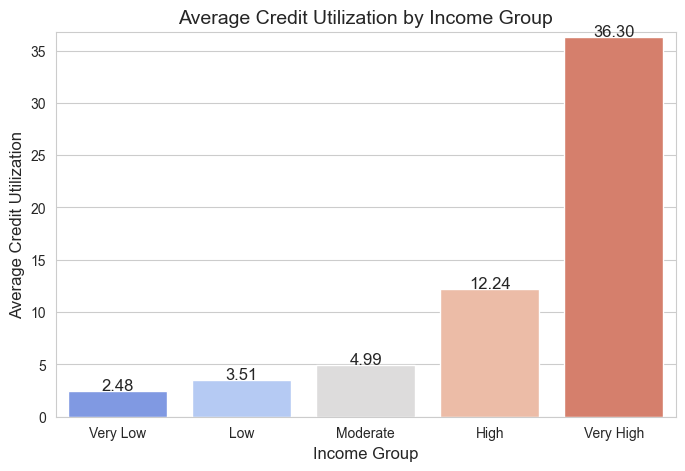

Income_Group
Very Low      2.480846
Low           3.507414
Moderate      4.989169
High         12.236286
Very High    36.298930
Name: RevolvingUtil, dtype: float64


In [ ]:
# Average Credit Utilization by Income Group
credit_util_by_income = df_train.groupby("Income_Group")["RevolvingUtil"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=credit_util_by_income.index, y=credit_util_by_income.values, palette="coolwarm")

plt.title("Average Credit Utilization by Income Group", fontsize=14)
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Average Credit Utilization", fontsize=12)
plt.ylim(0, max(credit_util_by_income.values) + 0.5)  

for i, utilization in enumerate(credit_util_by_income.values):
    plt.text(i, utilization + 0.05, f"{utilization:.2f}", ha="center", fontsize=12)

plt.show()

print(credit_util_by_income)

Interpretation:

- Very Low & Low-income borrowers have moderate credit utilization.
- Middle-income borrowers have higher utilization (around 5x their credit limit).
- High-income borrowers show surprisingly high utilization (12.24), which needs investigation.
- Very High-Income borrowers (36.30) might be leveraging credit significantly or have outliers.

In [19]:
# Step 1: Compare default rates for borrowers with and without late payments
late_payers = df_train[df_train["PastDue90"] > 0]
on_time_payers = df_train[df_train["PastDue90"] == 0]

default_rate_late = late_payers["Default"].mean()
default_rate_on_time = on_time_payers["Default"].mean()

print(f"Default Rate for Late Payers: {default_rate_late:.2%}")
print(f"Default Rate for On-Time Payers: {default_rate_on_time:.2%}")

Default Rate for Late Payers: 41.64%
Default Rate for On-Time Payers: 4.63%


C:\Users\User\AppData\Local\Temp\ipykernel_6972\2592171754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["Default"], y=df_train["PastDue90"], palette="coolwarm")


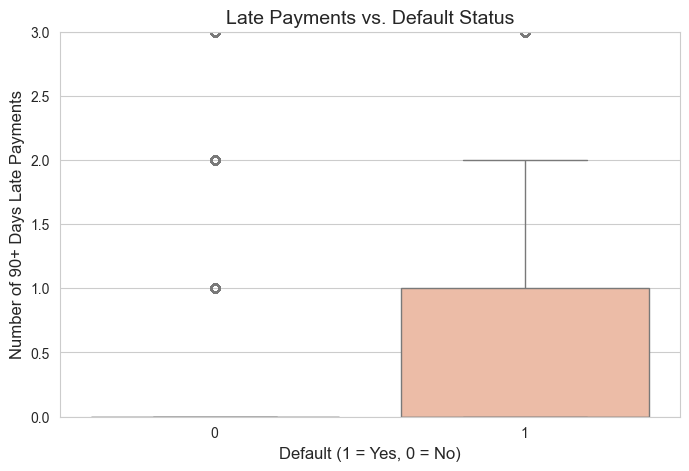

Correlation between Late Payments & Default: 0.12


In [20]:
# Step 2: Boxplot to visualize distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["Default"], y=df_train["PastDue90"], palette="coolwarm")
plt.title("Late Payments vs. Default Status", fontsize=14)
plt.xlabel("Default (1 = Yes, 0 = No)", fontsize=12)
plt.ylabel("Number of 90+ Days Late Payments", fontsize=12)
plt.ylim(0, df_train["PastDue90"].quantile(0.99))  # Exclude extreme outliers
plt.show()

# Step 3: Correlation Check
correlation = df_train[["PastDue90", "Default"]].corr().iloc[0, 1]
print(f"Correlation between Late Payments & Default: {correlation:.2f}")

Interpretation:

- Borrowers with a history of 90+ day late payments are much riskier
- 41.64% default rate for late payers
- Correlation is not very strong (0.12), meaning default risk depends on multiple features.

## Does the Number of Open Credit Lines Affect Default Risk?

In [21]:
# Borrowers by Open Credit Lines
df_train["Credit_Line_Group"] = pd.cut(df_train["OpenCreditLines"], 
                                       bins=[0, 3, 6, 9, 12, np.inf], 
                                       labels=["0-3", "4-6", "7-9", "10-12", "13+"])

default_rates = df_train.groupby("Credit_Line_Group")["Default"].mean() * 100
print("Default Rate by Credit Line Group:\n", default_rates)

Default Rate by Credit Line Group:
 Credit_Line_Group
0-3      9.304632
4-6      6.070137
7-9      5.427587
10-12    5.959920
13+      6.668112
Name: Default, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_6972\3320632476.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df_train.groupby("Credit_Line_Group")["Default"].mean() * 100


C:\Users\User\AppData\Local\Temp\ipykernel_6972\2903864539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette="coolwarm")


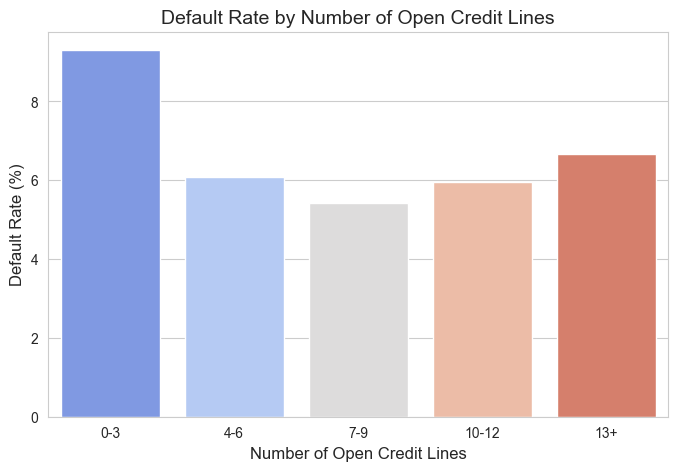

C:\Users\User\AppData\Local\Temp\ipykernel_6972\2903864539.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["Default"], y=df_train["OpenCreditLines"], palette="coolwarm")


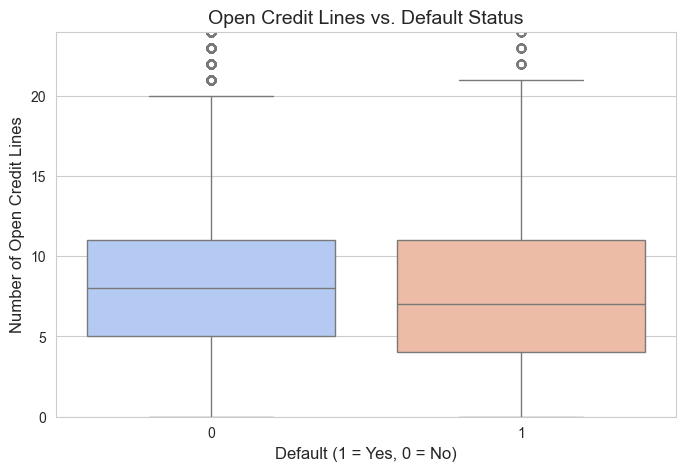

Correlation between Open Credit Lines & Default: -0.03


In [22]:
# Step 3: Bar Plot to Compare Default Rates
plt.figure(figsize=(8, 5))
sns.barplot(x=default_rates.index, y=default_rates.values, palette="coolwarm")
plt.title("Default Rate by Number of Open Credit Lines", fontsize=14)
plt.xlabel("Number of Open Credit Lines", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.show()

# Step 4: Boxplot to See Distribution of Open Credit Lines by Default Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["Default"], y=df_train["OpenCreditLines"], palette="coolwarm")
plt.title("Open Credit Lines vs. Default Status", fontsize=14)
plt.xlabel("Default (1 = Yes, 0 = No)", fontsize=12)
plt.ylabel("Number of Open Credit Lines", fontsize=12)
plt.ylim(0, df_train["OpenCreditLines"].quantile(0.99))  # Limit extreme values
plt.show()

# Step 5: Correlation Check
correlation = df_train[["OpenCreditLines", "Default"]].corr().iloc[0, 1]
print(f"Correlation between Open Credit Lines & Default: {correlation:.2f}")